In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
# initializing model with weights='imagenet'i.e. we are carring its original weights
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.layers.core import Activation
from keras.layers import Dropout
tf.config.experimental_run_functions_eagerly(True)
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3) )

In [ ]:

(x_train, trainy), (x_test, testy) = fashion_mnist.load_data()

# expand new axis, channel axis
x_train = np.expand_dims(x_train, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)

# it's always better to normalize
x_train = x_train.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
x_train = tf.image.resize(x_train, [32,32]) # if we want to resize

print(x_train.shape)
# (60000, 32, 32, 3)


# expand new axis, channel axis
x_test = np.expand_dims(x_test, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
x_test = np.repeat(x_test, 3, axis=-1)

# it's always better to normalize
x_test = x_test.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
x_test = tf.image.resize(x_test, [32,32]) # if we want to resize

print(x_test.shape)
# (60000, 32, 32, 3)


# one hot encode target values
trainy = to_categorical(trainy)
testy = to_categorical(testy)


(60000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:


# data_augmentation = layers.experimental.preprocessing.RandomFlip("horizontal")(dense2)

# Add data augmentation layer


input_layer=layers.Input(shape=(32,32,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()
print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer)

# Add dense layer
dense1=layers.Dense(50,activation='relu')(flatten)
#dropout_layer2 = layers.Dropout(0.65)(dense1)
dense1=layers.Dense(50,activation='relu' )(flatten)

#dropout_layer = layers.Dropout(0.65)(dense2)

# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(flatten)

final_layer = Activation('softmax')(flatten)
# Creating modle with input and output layer
model=models.Model(inputs=input_layer , outputs=output_layer)

# Summarize the model
model.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()

Model compilation completed.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (

In [ ]:
history = model.fit(x_train,trainy,epochs=20,batch_size=128,verbose=True, validation_data=(x_test, testy))

print("Fitting the model completed.")

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
469/469 [==============================] - 57s 121ms/step - loss: 0.9505 - accuracy: 0.6646 - val_loss: 0.4312 - val_accuracy: 0.8422
Epoch 2/20
469/469 [==============================] - 58s 123ms/step - loss: 0.3386 - accuracy: 0.8793 - val_loss: 0.3013 - val_accuracy: 0.8924
Epoch 3/20
469/469 [==============================] - 54s 116ms/step - loss: 0.2641 - accuracy: 0.9046 - val_loss: 0.2897 - val_accuracy: 0.8976
Epoch 4/20
469/469 [==============================] - 56s 120ms/step - loss: 0.2326 - accuracy: 0.9160 - val_loss: 0.2481 - val_accuracy: 0.9116
Epoch 5/20
469/469 [==============================] - 55s 117ms/step - loss: 0.2063 - accuracy: 0.9276 - val_loss: 0.2308 - val_accuracy: 0.9185
Epoch 6/20
469/469 [==============================] - 55s 116ms/step - loss: 0.1892 - accuracy: 0.9316 - val_loss: 0.2471 - val_accuracy: 0.9143
Epoch 7/20
469/469 [==============================] - 55s 118ms/step - loss: 0.1768 - accuracy: 0.9363 - val_loss: 0.2353 - val_ac

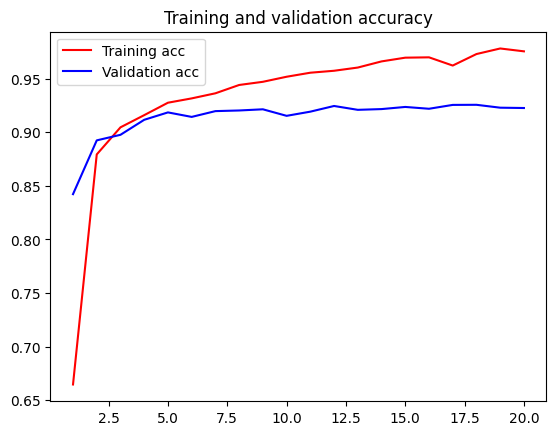

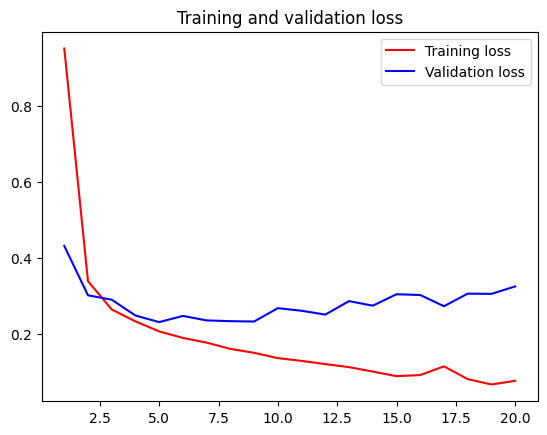

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:


# data_augmentation = layers.experimental.preprocessing.RandomFlip("horizontal")(dense2)

# Add data augmentation layer


input_layer=layers.Input(shape=(32,32,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()
print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer)

# Add dense layer
dense1=layers.Dense(50,activation='relu')(flatten)
dropout_layer2 = layers.Dropout(0.50)(dense1)
dense2=layers.Dense(50,activation='relu' )(dropout_layer2)



# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(dense2)

final_layer = Activation('softmax')(output_layer)
# Creating modle with input and output layer
model=models.Model(inputs=input_layer , outputs=output_layer)

# Summarize the model
model.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()

Model compilation completed.
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (

In [ ]:
history = model.fit(x_train,trainy,epochs=20,batch_size=128,verbose=True, validation_data=(x_test, testy))

print("Fitting the model completed.")

Epoch 1/20
469/469 [==============================] - 62s 132ms/step - loss: 1.3597 - accuracy: 0.4915 - val_loss: 0.6039 - val_accuracy: 0.7589
Epoch 2/20
469/469 [==============================] - 61s 129ms/step - loss: 0.6426 - accuracy: 0.7561 - val_loss: 0.5091 - val_accuracy: 0.7908
Epoch 3/20
469/469 [==============================] - 62s 132ms/step - loss: 0.5117 - accuracy: 0.8227 - val_loss: 0.3885 - val_accuracy: 0.8826
Epoch 4/20
469/469 [==============================] - 61s 131ms/step - loss: 0.4268 - accuracy: 0.8576 - val_loss: 0.2913 - val_accuracy: 0.9008
Epoch 5/20
469/469 [==============================] - 60s 129ms/step - loss: 0.3851 - accuracy: 0.8680 - val_loss: 0.3729 - val_accuracy: 0.8872
Epoch 6/20
469/469 [==============================] - 61s 129ms/step - loss: 0.3559 - accuracy: 0.8852 - val_loss: 0.3712 - val_accuracy: 0.8730
Epoch 7/20
469/469 [==============================] - 62s 132ms/step - loss: 0.3335 - accuracy: 0.8923 - val_loss: 0.3810 - val_ac

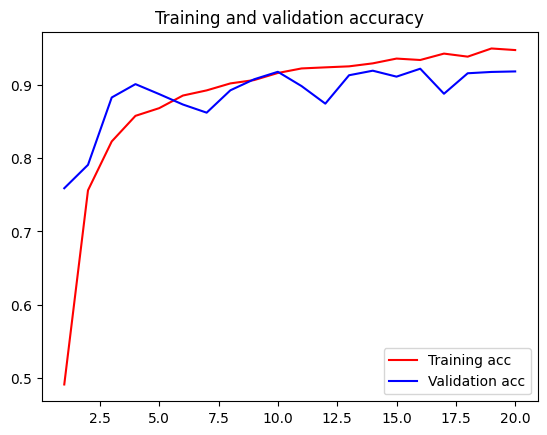

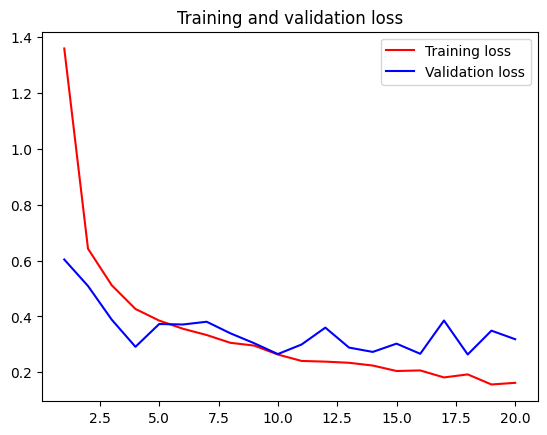

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:


# data_augmentation = layers.experimental.preprocessing.RandomFlip("horizontal")(dense2)

# Add data augmentation layer


input_layer=layers.Input(shape=(32,32,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()
print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer)

# Add dense layer
dense1=layers.Dense(50,activation='relu', kernel_regularizer= tf.keras.regularizers.L2(0.01))(flatten)
dropout_layer2 = layers.Dropout(0.50)(dense1)
dense2=layers.Dense(50,activation='relu' )(dropout_layer2)



# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(dense2)
# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax' , kernel_regularizer= tf.keras.regularizers.L2(0.01))(dense2)

final_layer = Activation('softmax')(flatten)
# Creating modle with input and output layer
model=models.Model(inputs=input_layer , outputs=output_layer)

# Summarize the model
model.summary()



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()

In [ ]:
history = model.fit(x_train,trainy,epochs=20,batch_size=128,verbose=True, validation_data=(x_test, testy))

print("Fitting the model completed.")

In [ ]:
# plot the loss and accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()